# Objectives
### This course used real-life dataset "coffee listings from all walmart stores"
1. Sampling, sampling bias and Pseudo-random number generation
2. Sampling methods 
 - Simple random sampling and systematic sampling
 - Stratified and weighted random sampling
 - Cluster sampling 
3. Sampling distribution and sample size
4. Bootstrap
 - Sampling and bootstrap distributions
 - Confidence interval

## 1. Introduction to Sampling

### 1.1 Introduction to Sampling
- Population and sample
- **df.sample(n=19)** returns a ramdon subset of rows

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Clean the dataset**

In [3]:
coff_rating = pd.read_csv('/QXJ/Python/Datacamp/coffee-listings-from-all-walmart-stores.csv')
coff_rating.head()

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8


In [4]:
coff_rating.columns

Index(['title', 'coffee_type', 'rating', 'reviews', 'seller_name', 'thumbnail',
       'price', 'weight', 'weight_formatted_to_gramms'],
      dtype='object')

In [5]:
coff_rating.drop(['seller_name', 'thumbnail', 'weight'], axis = 1, inplace = True)
coff_rating.head()

,title,coffee_type,rating,reviews,price,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,13.92,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,3.76,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,9.97,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,9.92,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,9.98,1360.8


In [6]:
coff_rating.rename(columns = {'weight_formatted_to_gramms':'weight_g'}, inplace = True)
coff_rating.head()

,title,coffee_type,rating,reviews,price,weight_g
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,13.92,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,3.76,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,9.97,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,9.92,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,9.98,1360.8


In [7]:
print(coff_rating.isna().sum())

title            0
coffee_type    279
rating           0
reviews          0
price            0
weight_g         0
dtype: int64


In [8]:
print(coff_rating.index)

RangeIndex(start=0, stop=1400, step=1)


In [9]:
import numpy as np
coff_rating = coff_rating.dropna(axis = 0)
print(coff_rating.isna().sum())
print(coff_rating.index.value_counts())

title          0
coffee_type    0
rating         0
reviews        0
price          0
weight_g       0
dtype: int64
0       1
900     1
908     1
907     1
906     1
       ..
441     1
442     1
443     1
444     1
1399    1
Length: 1121, dtype: int64


In [10]:
coff_rating.to_csv('/QXJ/Python/Datacamp/coffee_rating_walmart.csv')

**Sampling**

In [10]:
# subsetting the dataframe 
price_vs_rating = coff_rating[['price', 'rating']]
price_vs_rating.head()

,price,rating
0,13.92,3.8
1,3.76,4.7
2,9.97,4.4
4,9.98,4.7
5,7.98,4.2


In [11]:
# sampling 10 rows
price_vs_rating_samp = price_vs_rating.sample(n = 10)
price_vs_rating_samp
# rows from the original dataset cannot appear in the sample 

,price,rating
502,5.72,4.7
1061,12.24,4.5
338,17.92,4.7
1304,1.00,4.6
978,7.68,4.5
783,7.76,4.9
1185,24.77,4.8
296,12.53,0.0
209,16.92,4.6
219,14.92,4.6


In [15]:
# python sampling for series: n = rows
rating_samp = coff_rating['rating'].sample(n = 20)
rating_samp.head()

672    4.6
175    4.6
783    4.9
583    4.9
593    4.6
Name: rating, dtype: float64

In [16]:
# python sampling for series 
rating_samp = price_vs_rating['rating'].sample(n = 20)

**population parameters & point estimates**
<br>
*It is a calculation made on the population dataset*

In [17]:
# the mean of population
print(np.mean(coff_rating['rating']))
# the mean of samples
print(np.mean(rating_samp))

4.143710972346124
4.08


### 1.2 Sample bias: convenience sampling 
- The sample is collected by the easiest method, so the samples are not representative of population 
- Use histogram to avoid the bias 

In [19]:
# convenience sampling: to take the mean of the top 20 rows 
print(coff_rating['rating'].head(20).mean())
# the mean is much higher then the mean of population: 
# the good ratings are more likely appear at the top of the dataset

4.33


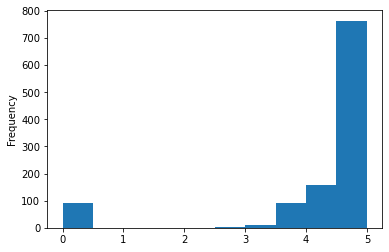

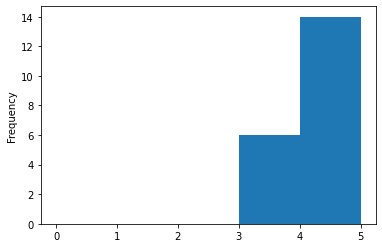

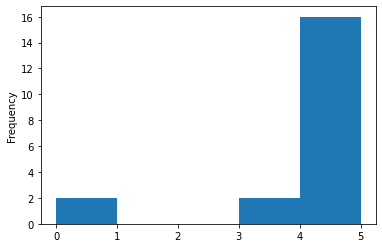

In [27]:
# visulize the selection bias
# population histogram
coff_rating['rating'].plot.hist()
plt.show()
# convenience histogram
coff_rating['rating'].head(20).plot.hist(bins = np.arange(0,6,1))
plt.show()
# random sampling histogram
rating_samp.plot.hist(bins = np.arange(0,6,1))
plt.show()

### 2.3 Pseudo-random number generation
- True random numers: generated from physical processes, like flipping coines
- Persudo-random number generation is fast and cheap: it is calculated from the previous random number
- The first "random" number calculated from a seed: the same seed value yields the same random values
- numpy.random, such as np.random.beta()
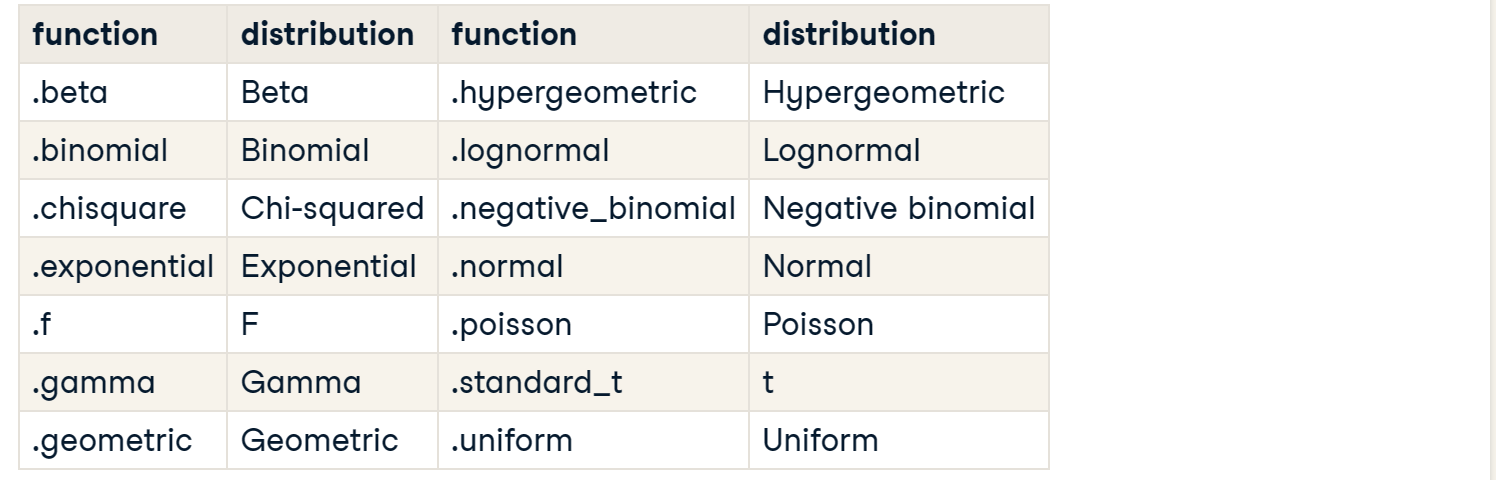

In [52]:
# a, b specify distribution parameters: from a continous distribution
randoms = np.random.beta(a = 2, b = 2, size = 2000)
randoms[:5]

array([0.719966  , 0.75161076, 0.77467119, 0.38000971, 0.17111321])

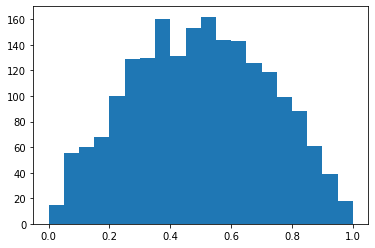

In [53]:
# visualize
plt.hist(randoms, bins = np.arange(0, 1.05, 0.05))
plt.show()

In [56]:
# set seed with numpy 
np.random.seed(20000)

In [57]:
# generate Pseudo-random numbers from normal distribution
# loc = mean, scale = standard deviation
np.random.normal(loc = 2, scale = 1.5, size = 2)

array([3.52871857, 1.54711927])

In [59]:
# set seed as same as the last one 
np.random.seed(20000)

In [60]:
# second call to get different random number
np.random.normal(loc = 2, scale = 1.5, size = 2)
# starting from the same seed to get the same random numbers

array([3.52871857, 1.54711927])

In [61]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=500)
uniforms[:5]

array([-1.34312354, -1.91331102, -2.5375613 ,  1.70383103, -0.82820154])

## *The methods to sampling from the population* 

## 2. Simple random and systematic sampling
- Simple random method 
- System sampling method by defining the interval 
 - to decide how big is the inerval between rows for a given sample size
 - troubleshoot
 - shuffle + systematic sample = random sample

**simple randome method**

In [12]:
# simple randome method
# use random_state to set the seed 
coff_rating.sample(n=5, random_state = 100)

,title,coffee_type,rating,reviews,price,weight_g
134,"starbucks veranda blend, ground coffee, starbu...",blonde roast,4.6,955,18.48,793.8
204,the original donut shop decaf k-cup coffee pod...,medium roast,4.6,674,14.92,680.4
534,the coffee bean &amp; tea leaf mexico organic ...,dark roast,4.6,39,12.58,907.2
580,"dunkin' original blend, medium roast coffee, 3...",medium roast,4.8,870,17.92,850.5
843,"stok cold brew coffee, black unsweetened, 48 oz.",cold brew coffee,4.7,367,5.28,1360.8


**system sampling method**

In [13]:
# system sampling method 
sample_size = 5
pop_size = len(coff_rating)
print(pop_size)

1400


In [14]:
# decide the interval 
interval_ = pop_size/sample_size
# to discard the fractional part
interval = pop_size//sample_size
print(interval_)
print(interval)

280.0
280


In [16]:
# select the rows with interval of 280
# :: to select every 280 row from zero to the end 
coff_rating.iloc[::interval]

,title,coffee_type,rating,reviews,price,weight_g
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,13.92,1142.5
280,"1850 black gold, dark roast coffee, k-cup pods...",dark roast,4.5,7017,14.92,680.4
560,"folgers black silk ground coffee, smooth dark ...","black silk ground coffee,dark roast",4.9,20,13.98,955.4
840,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,9.92,1204.9
1120,"backyard beans coffee - punch in the face, org...",dark roast,0.0,0,13.08,340.2


   index                                              title  \
0      0    folgers classic roast ground coffee, 40.3-ounce   
1      1  café bustelo, espresso style dark roast ground...   
2      2  folgers classic roast ground coffee, medium ro...   
3      3  maxwell house original roast ground coffee, 42...   
4      4  great value classic roast medium ground coffee...   

                  coffee_type  rating  reviews  price  weight_g  
0               classic roast     3.8       93  13.92    1142.5  
1         espresso,dark roast     4.7      914   3.76     283.5  
2  medium roast,classic roast     4.4      740   9.97     734.3  
3                         NaN     4.8     1321   9.92    1204.9  
4               classic roast     4.7     1598   9.98    1360.8  


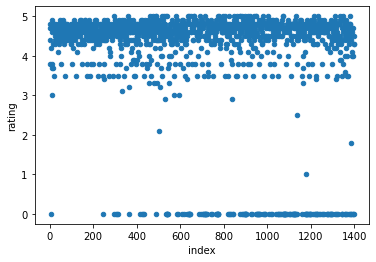

In [23]:
# The trouble with systematic sampling 
coff_rating_with_id = coff_rating.reset_index()
print(coff_rating_with_id.head())
coff_rating_with_id.plot(x='index', y='rating', kind = 'scatter')
plt.show()

**Systematic sampling is only safe if we do not see a patter in scatter plot**
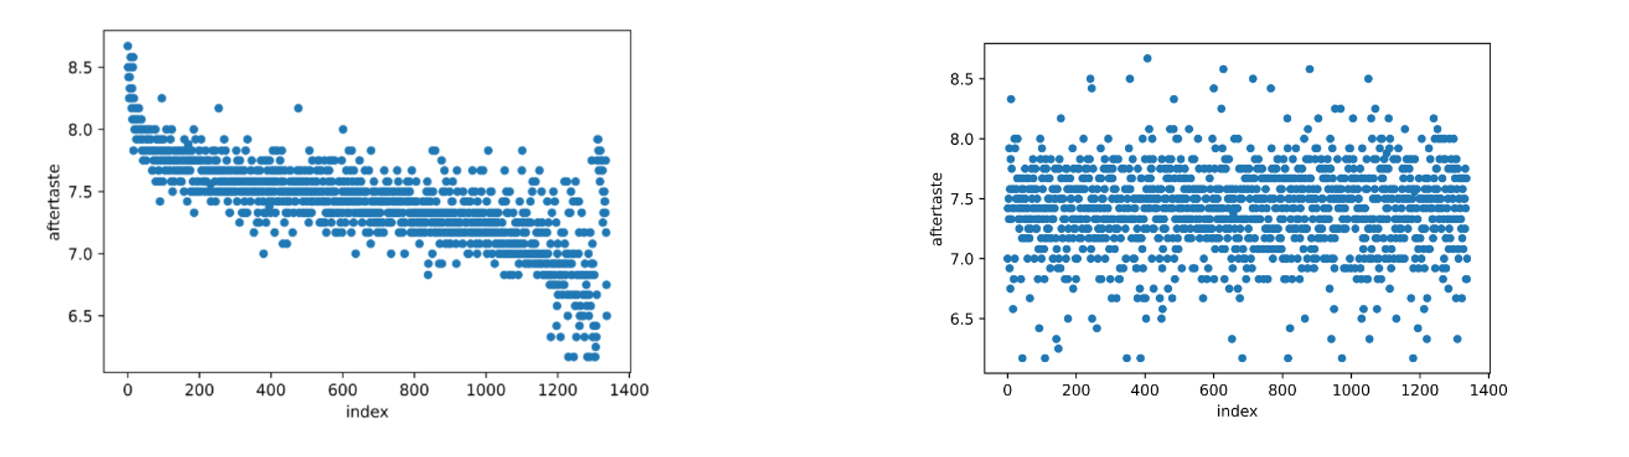

In [27]:
# making systematic sampling safe
# frac to specify the proportion of the dataset to return in the sample, 
# rather than the absolute number of rows that n specifies
# frac = 1 select the whole dataset but shuffle the rows
shuffled = coff_rating.sample(frac=1)

# after shuffling reset the index
# chain reset_index() create a column containing these new indexes
shuffled = shuffled.reset_index(drop = True).reset_index()
print(shuffled.head())

   index                                              title  \
0      0  caf escapes caf caramel, keurig single-serve k...   
1      1  caf bustelo espresso roast style coffee keurig...   
2      2  folgers black silk ground coffee, smooth dark ...   
3      3  tully's coffee hawaiian blend k-cup pods, medi...   
4      4  4-arabica-coffee arabica coffee plant in 4 in....   

                           coffee_type  rating  reviews  price  weight_g  
0                              caramel     4.3      850  24.73     680.4  
1              espresso,espresso roast     3.6        5  26.98    1360.8  
2  black silk ground coffee,dark roast     4.6       11  10.32     640.7  
3                         medium roast     4.6     1133  22.10     680.4  
4                              arabica     0.0        0  12.53     340.2  


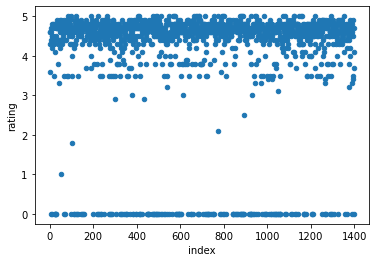

In [29]:
# after shuffled, the small indexes have also the smooth rating points
shuffled.plot(x = 'index', y = 'rating', kind = 'scatter')
plt.show()

In [31]:
coff_rating = coff_rating.dropna(axis = 0)

In [32]:
print(len(coff_rating))

1121


In [33]:
coff_rating.to_csv('/QXJ/Python/Datacamp/coffee_rating_walmart.csv')

### 2.2 Stratified and weighted random sampling
- Stratified sampling: a technique allows us to sample a population that containes subgroups (split the population into subgroup -> sampling from each subgroup)
 - equal proportion from the population
 - equal counts from the population 
 - different weigt from the population
- Problem: too expensive because we need to collect data from different subgroup

In [36]:
coffee_cat = coff_rating.groupby('coffee_type').agg({'coffee_type':len})
print(coffee_cat)

                                                    coffee_type
coffee_type                                                    
americano,caffe americano,medium dark,medium da...            1
arabica                                                      28
arabica,dark roast                                            6
arabica,light roast                                           1
arabica,medium roast                                         44
...                                                         ...
mocha,instant coffee                                          1
mocha,latte                                                   1
mocha,light roast                                             2
mocha,medium roast                                            4
vienna                                                        1

[120 rows x 1 columns]


In [57]:
cat_count = coff_rating['coffee_type'].value_counts(normalize = True)
cat_count

medium roast                                         0.279215
dark roast                                           0.072257
light roast                                          0.054416
black silk ground coffee,dark roast                  0.053524
colombian,medium roast                               0.049063
                                                       ...   
espresso,ristretto                                   0.000892
mocha,instant coffee                                 0.000892
macchiato,mocha,medium roast                         0.000892
espresso,medium dark,medium dark roast,dark roast    0.000892
iced coffee,latte                                    0.000892
Name: coffee_type, Length: 120, dtype: float64

In [55]:
# narrowing the type to 5 types
top_type = ['medium roast', 'dark roast', 'light roast', 
            'black silk ground coffee,dark roast','colombian,medium roast' ]
top_type_coffee = coff_rating[coff_rating['coffee_type'].isin(top_type)]
top_type_coffee.head()

,title,coffee_type,rating,reviews,price,weight_g
10,"folgers black silk ground coffee, smooth dark ...","black silk ground coffee,dark roast",4.9,20,13.98,955.4
11,"folgers black silk ground coffee, smooth dark ...","black silk ground coffee,dark roast",4.6,11,10.32,640.7
15,"mccafe premium roast ground coffee, medium roa...",medium roast,4.7,1512,12.98,850.5
16,maxwell house medium roast 100% colombian grou...,"colombian,medium roast",4.7,667,7.86,694.6
17,"dunkin' original blend, medium roast coffee, 3...",medium roast,4.8,870,17.92,850.5


In [49]:
# Counts of a simple random sample
coffee_rating_samp = top_type_coffee.sample(frac = 0.1, random_state = 100)
print(len(coffee_rating_samp))
print(coffee_rating_samp.head())

57
                                                  title  \
926   new mexico pion coffee traditional pion coffee...   
482   community coffee breakfast blend medium roast ...   
1013  folgers black silk ground coffee, smooth dark ...   
379         caf bustelo dark roast ground coffee, 16 oz   
1372  maxwell house breakfast blend light roast k-cu...   

                              coffee_type  rating  reviews  price  weight_g  
926                          medium roast     0.0        0   8.18     340.2  
482                          medium roast     4.9      287  35.97    2041.2  
1013  black silk ground coffee,dark roast     4.9       20  13.98     955.4  
379                            dark roast     4.7       50   5.98     453.6  
1372                          light roast     4.7       42  17.99     340.2  


In [54]:
# count each type 
print(coffee_rating_samp['coffee_type'].value_counts(normalize = True))

medium roast                           0.508772
light roast                            0.157895
black silk ground coffee,dark roast    0.122807
dark roast                             0.105263
colombian,medium roast                 0.105263
Name: coffee_type, dtype: float64


*The different proportion from the population and samples could be a problem*

**Proportional stratified sampling**

In [65]:
coffee_type_strat = top_type_coffee.groupby('coffee_type')\
.sample(frac = 0.1, random_state = 100)
coffee_type_strat['coffee_type'].value_counts(normalize = True)

medium roast                           0.543860
dark roast                             0.140351
black silk ground coffee,dark roast    0.105263
colombian,medium roast                 0.105263
light roast                            0.105263
Name: coffee_type, dtype: float64

**Equal counts stratified sampling**
*eqal counts from the population*

In [63]:
coffee_type_eq = top_type_coffee.groupby('coffee_type')\
.sample(n = 10, random_state = 100)
coffee_type_eq['coffee_type'].value_counts(normalize = True)

black silk ground coffee,dark roast    0.2
colombian,medium roast                 0.2
dark roast                             0.2
light roast                            0.2
medium roast                           0.2
Name: coffee_type, dtype: float64

**Weighted random sampling**
*adjust the relative probability of a row being sampled*
<br>
It is common in political polling because we need to correct under- or over- representation of demographic group

In [76]:
# create a condition 
coffee_type_weight = top_type_coffee
condition = coffee_type_weight['coffee_type'] == 'dark roast'

# where condition to set a weight of 2 for rows match the condition
# a weight of 1 for rows do not match the condition
coffee_type_weight['weight'] = np.where(condition, 2, 1)
# This means each row is randomly sampled, medium roast coffee has 2 times of chances to be picked
coffee_type_weight = coffee_type_weight.sample(frac = 0.1, weights = 'weight')

# 10% weighted sample: 
coffee_type_weight['coffee_type'].value_counts(normalize = True)

C:\Users\QXJ\AppData\Local\Temp\ipykernel_5392\567257995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_type_weight['weight'] = np.where(condition, 2, 1)


medium roast                           0.456140
dark roast                             0.228070
colombian,medium roast                 0.105263
black silk ground coffee,dark roast    0.105263
light roast                            0.105263
Name: coffee_type, dtype: float64

### 2.3 Cluster sampling (multistage sampling)
- Use simple random sampling to pick some subgroups 
- Use simple random sampling on only those subgroups 
- Cluster sampling 
 - **random sample** from the subgroups, such as choose 5 types from 10 types
 - subsetting data of these 5 types from the whole dateset
 - categorize the type coloumn and remove_unused_categories()
 - group by the types and sampling directly equal rows from each type - **equal counts stratified sampling**

In [79]:
coffee_type = list(coff_rating['coffee_type'].unique())
print(len(coffee_type))

120


In [80]:
# sampling for subgroups 
import random
# to get 10 random subgroups
type_samp = random.sample(coffee_type, k = 10)
print(type_samp)

['instant coffee,dark roast', 'espresso,mocha,espresso coffee,latte', 'french,french roast,instant coffee,arabica,dark roast', 'espresso,dark roast', 'espresso,caramel,macchiato', 'caramel,cappuccino,instant coffee,medium roast', 'arabica,medium roast', 'macchiato,mocha,medium roast', 'cappuccino,instant coffee,medium roast', 'french,dark roast']


In [105]:
# sampling each group
type_condition = coff_rating['coffee_type'].isin(type_samp)
coffee_type_cluster = coff_rating[type_condition].reset_index(drop = True)
print(coffee_type_cluster.head())
coffee_type_cluster['coffee_type'] = coffee_type_cluster['coffee_type'].astype('category')

                                               title           coffee_type  \
0  café bustelo, espresso style dark roast ground...   espresso,dark roast   
1  caf bustelo, espresso style dark roast ground ...   espresso,dark roast   
2  great value donut shop 100% arabica medium roa...  arabica,medium roast   
3  café bustelo, espresso style dark roast ground...   espresso,dark roast   
4  great value donut shop, 100% arabica, medium r...  arabica,medium roast   

   rating  reviews  price  weight_g  
0     4.7      914   3.76     283.5  
1     4.7      914   3.76     283.5  
2     4.5      673   0.00     340.2  
3     4.7      914   3.76     283.5  
4     4.5       97  11.72     907.2  


In [108]:
# remove levels with 0 rows becuase you need sampling from each row 
coffee_type_cluster['coffee_type'] = coffee_type_cluster['coffee_type'].cat.remove_unused_categories()
coffee_type_cluster.head(5)

,title,coffee_type,rating,reviews,price,weight_g
0,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,3.76,283.5
1,"caf bustelo, espresso style dark roast ground ...","espresso,dark roast",4.7,914,3.76,283.5
2,great value donut shop 100% arabica medium roa...,"arabica,medium roast",4.5,673,0.00,340.2
3,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,3.76,283.5
4,"great value donut shop, 100% arabica, medium r...","arabica,medium roast",4.5,97,11.72,907.2


**Category type**
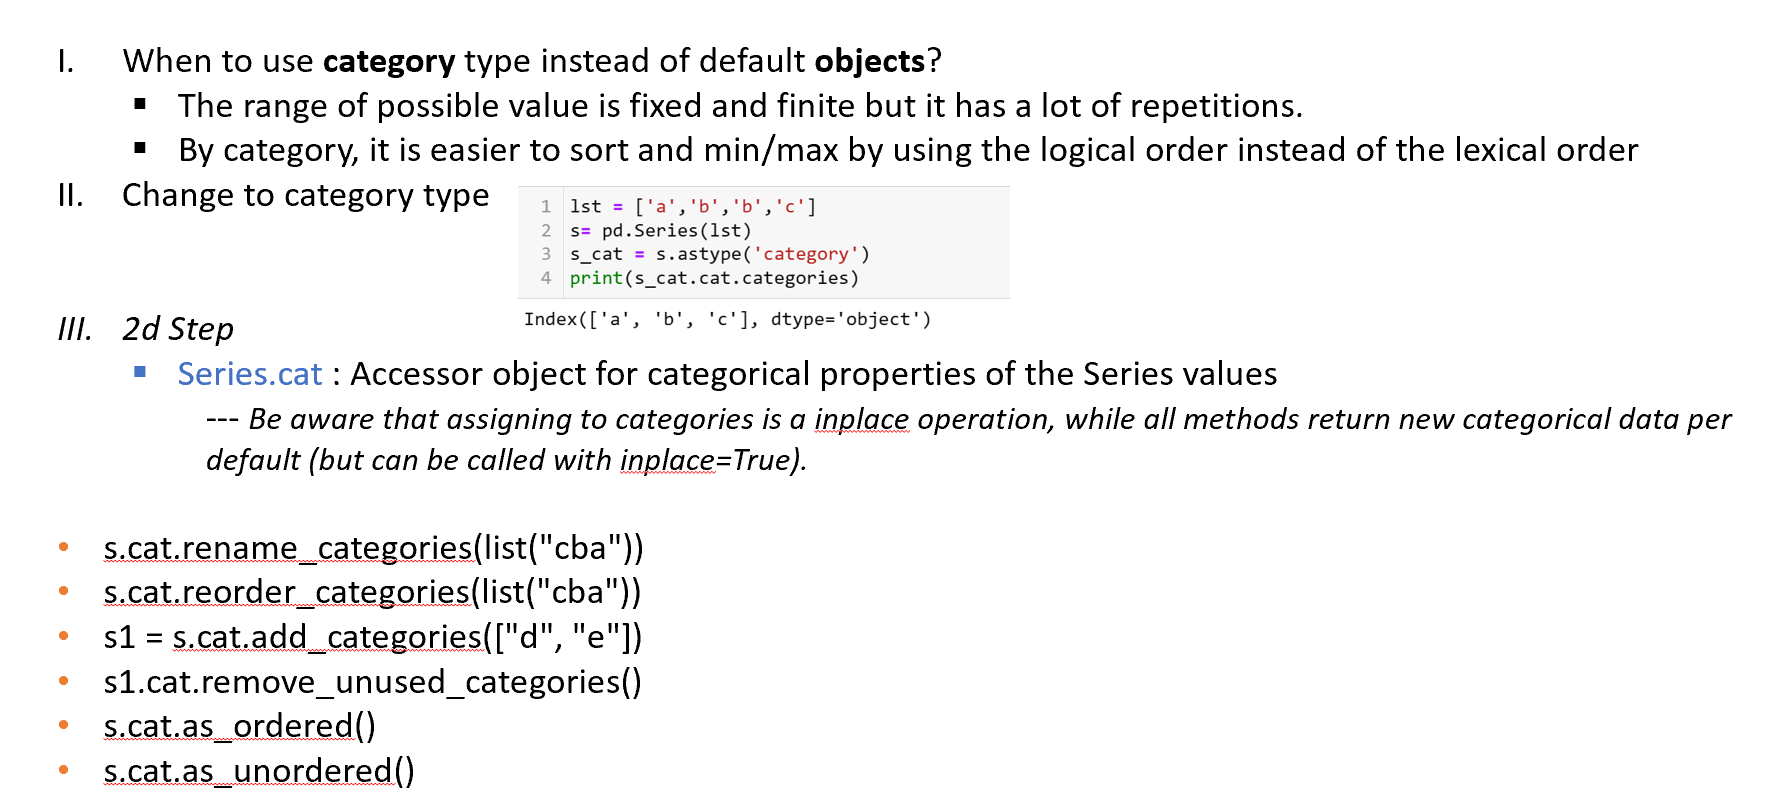

In [109]:
# Sampling 2 rows from each coffee type
coffee_type_cluster.groupby('coffee_type')\
.sample(n = 1, random_state = 100)

,title,coffee_type,rating,reviews,price,weight_g
12,great value decaf 100% arabica breakfast blend...,"arabica,medium roast",4.2,150,4.32,340.2
85,hills bros. cappuccino english toffee medium r...,"cappuccino,instant coffee,medium roast",4.7,487,3.72,453.6
92,hills bros. cappuccino white chocolate caramel...,"caramel,cappuccino,instant coffee,medium roast",4.7,247,0.00,453.6
71,gevalia frothy 2-step caramel macchiato espres...,"espresso,caramel,macchiato",4.6,182,6.98,340.2
41,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,3.76,283.5
35,gevalia mocha latte k-cup espresso coffee pods...,"espresso,mocha,espresso coffee,latte",4.5,5315,13.66,340.2
49,"french market coffee &amp; chicory, dark roast...","french,dark roast",4.8,142,6.03,340.2
100,starbucks via french roast instant coffee pack...,"french,french roast,instant coffee,arabica,dar...",4.7,1134,5.38,283.5
98,"nescaf clasico decaf, dark roast instant coffe...","instant coffee,dark roast",4.4,28,5.28,99.2
59,eight o'clock barista blends mocha macchiato m...,"macchiato,mocha,medium roast",4.6,255,5.98,311.8


In [111]:
print(len(coffee_type_cluster))

106


In [117]:
# to subsetting before sampling 
# to get 10 random subgroups but 
top_type_coffee_smaller = list(top_type_coffee['coffee_type'].unique())

# be aware that the 1st arugment must be a list
type_samp_smaller = random.sample(top_type_coffee_smaller, k = 3)
print(type_samp_smaller)

['medium roast', 'light roast', 'dark roast']


In [130]:
# filter the dataset to those three types
coffee_type_cluster_smaller = coff_rating[coff_rating['coffee_type'].isin(type_samp_smaller)].reset_index(drop = True)
coffee_type_cluster_smaller['coffee_type'] = coffee_type_cluster_smaller['coffee_type'].astype('category')
coffee_type_cluster_smaller['coffee_type'] = coffee_type_cluster_smaller['coffee_type'].cat.remove_unused_categories()
coffee_type_cluster_smaller.groupby('coffee_type').sample(n =5, random_state = 100)

,title,coffee_type,rating,reviews,price,weight_g
74,green mountain coffee roasters dark magic coff...,dark roast,4.6,2266,14.92,680.4
440,"cuve coffee west pole, bold &amp; smoky ground...",dark roast,0.0,0,14.99,340.2
148,revv no surrender keurig single-serve k-cup po...,dark roast,4.5,315,14.92,680.4
39,"1850 black gold coffee, dark roast ground coff...",dark roast,4.5,4165,8.48,340.2
358,"starbucks morning joe, ground coffee, dark roa...",dark roast,4.7,2383,0.00,340.2
173,green mountain coffee wild mountain blueberry ...,light roast,4.6,2017,21.70,680.4
269,"kingdom coffee - african coffee, medium-light ...",light roast,0.0,0,14.00,283.5
401,gevalia signature blend mild light roast k-cup...,light roast,4.3,418,18.99,340.2
33,"mccafe breakfast blend k-cup coffee pods, ligh...",light roast,4.7,740,14.92,680.4
389,gevalia signature blend decaf mild light roast...,light roast,4.8,78,9.78,340.2


### Comparsion of three sampling methods
- All the sampling methods return similar number of rows
- All the sampling methods return similar mean as the population mean.
- Clustering sampling is a tiny little worse in the mean because it takes the samples of chosen categories. For example, if the type category is an important metric for the analysis, it is a bad idea to use cluster sampling. 

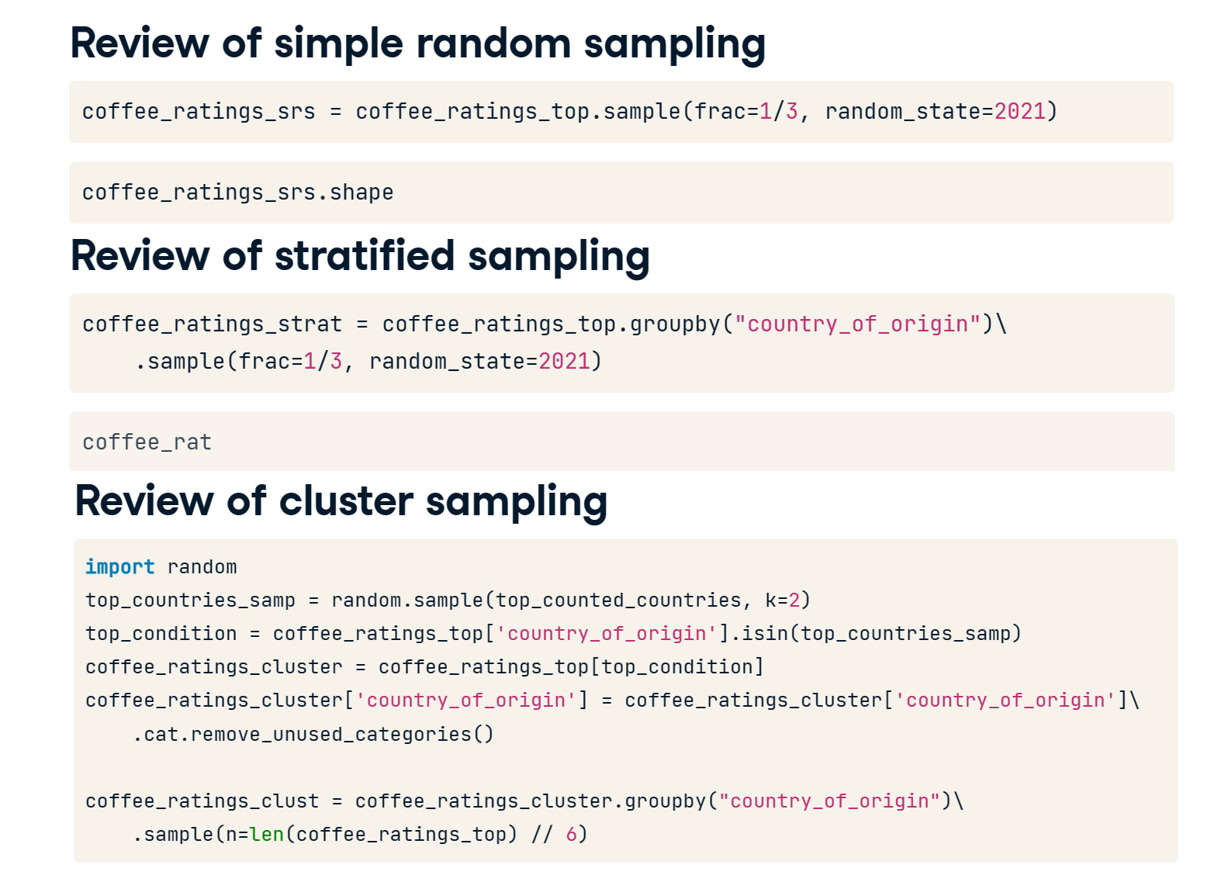

## 3. Sampling Distributions
- Relative error of point estimates
- Sampling distribution, approximate sampling distribution
- Standard errors and the Central Limit Theorem

### 3.1 Relative error of point estimates
- really noise, particular for small sample
- the amplitude is initially steep, then flattens
- relative error decreases to zero (when the sample size = population)
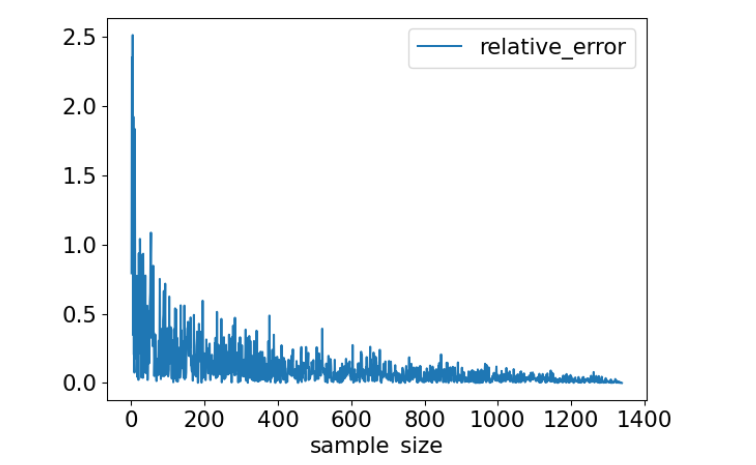

**How the size of sample affects the accuracy of the point estimte we calculated**
<br>
- *larger sample size will give us a more accurate results*
- *relative error: assess the difference the population and a sample mean.*
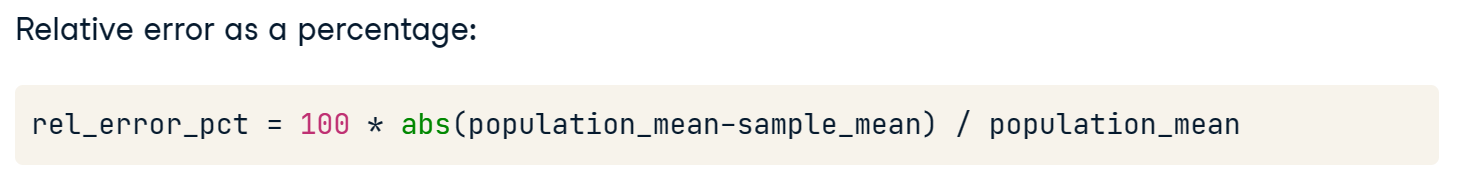

### 3.2 Creating a sampling distribution
- bigger sample results a narrower range
- more closer to the normal distribution 

In [142]:
# compare the sample distribution n = 30
mean_rating_1000 = []
for i in range(1000):
    mean_rating_1000.append(coff_rating.sample(n=30)['rating'].mean())

# n = 300
mean_rating_1000_more = []
for i in range(1000):
    mean_rating_1000_more.append(coff_rating.sample(n=300)['rating'].mean())

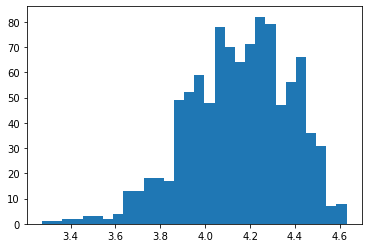

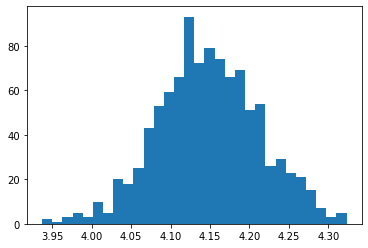

In [144]:
# visualize the sample distribution
plt.hist(mean_rating_1000, bins = 30)
plt.show()
plt.hist(mean_rating_1000_more, bins = 30)
plt.show()
# bigger sample results a narrower range

### 3.3 Approximate sampling distributions

**4 dice**
- expand_grid(dict) function generates all the combination (itertools package)

In [162]:
from itertools import product
dice = expand_grid(
{'dice1': [1,2,3,4,5,6],
'dice2': [1,2,3,4,5,6],
'dice3': [1,2,3,4,5,6],
'dice4': [1,2,3,4,5,6]})
dice


,dice1,dice2,dice3,dice4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
1291,6,6,6,2
1292,6,6,6,3
1293,6,6,6,4
1294,6,6,6,5


In [163]:
# mean roll
dice['mean_roll'] = (dice['dice1'] + dice['dice2'] + 
                     dice['dice3'] + dice['dice4'])/4
dice

,dice1,dice2,dice3,dice4,mean_roll
0,1,1,1,1,1.00
1,1,1,1,2,1.25
2,1,1,1,3,1.50
3,1,1,1,4,1.75
4,1,1,1,5,2.00
...,...,...,...,...,...
1291,6,6,6,2,5.00
1292,6,6,6,3,5.25
1293,6,6,6,4,5.50
1294,6,6,6,5,5.75


<AxesSubplot:>

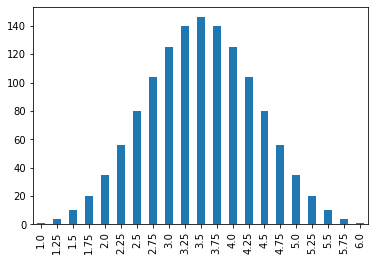

In [165]:
# plpt a barplot for discrete values 
# sampling distribution of the mean roll
dice['mean_roll'] = dice['mean_roll'].astype('category')
dice['mean_roll'].value_counts(sort = False).plot(kind='bar')

In [168]:
# The number of outcomes increase
n_dice = list(range(1,101))
n_outcomes = []
for n in n_dice:
    n_outcomes.append(6**n)
    
outcomes = pd.DataFrame(
{'n_dice':n_dice,
'n_outcomes':n_outcomes})

<AxesSubplot:xlabel='n_dice', ylabel='n_outcomes'>

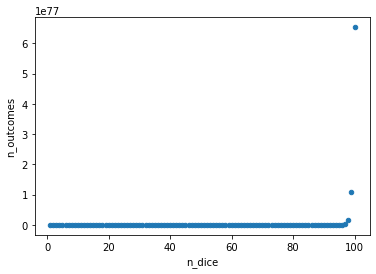

In [169]:
outcomes.plot(x='n_dice',y='n_outcomes',kind='scatter')
# It is getting complicated to calculate sampling mean while the dateset is getting larger

**Use approximate sampling distribution by simulating the mean**

In [172]:
samp_means_1000 = []
for i in range(1000):
    samp_means_1000.append(
    np.random.choice(list(range(1,7)),size =4, replace = True).mean())
samp_means_1000[:10]

[3.5, 3.25, 3.5, 2.5, 3.75, 3.5, 2.75, 3.5, 5.0, 3.0]

(array([  3.,   7.,  16.,  31.,  48.,  50.,  79.,  87., 114., 106., 122.,
         86.,  79.,  72.,  47.,  32.,  12.,   4.,   4.,   1.]),
 array([1.25  , 1.4875, 1.725 , 1.9625, 2.2   , 2.4375, 2.675 , 2.9125,
        3.15  , 3.3875, 3.625 , 3.8625, 4.1   , 4.3375, 4.575 , 4.8125,
        5.05  , 5.2875, 5.525 , 5.7625, 6.    ]),
 <BarContainer object of 20 artists>)

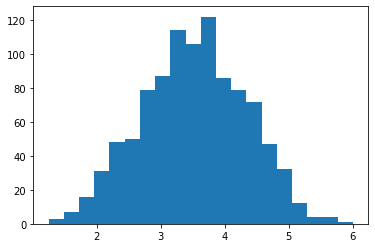

In [174]:
plt.hist(samp_means_1000, bins = 20)
# it is very close to the sampling distribution

### 3.3 Standard errors and the Central Limit Theorem
- The Gaussian distribution (also known as the normal distribution)
- The width of distribution shrinks as the sample size increases
- **standard error**: standard deviation of the sampling distribution, approximately to the **population std / sqrt(sample size)**
> **Central Limit Theorem**: average of independent samples have approximately normal distribution 

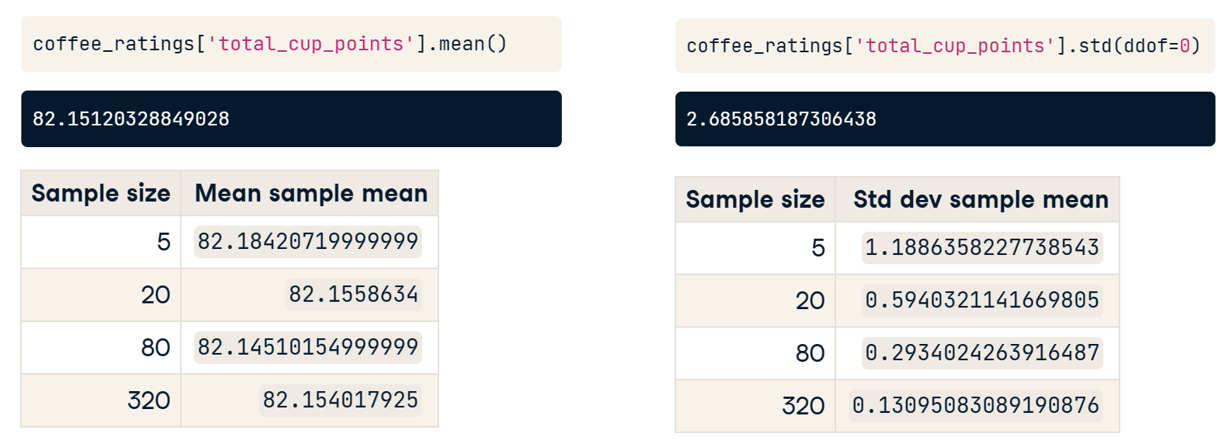
*With the sample size increases, the standard error decreases*

In [175]:
coff_rating['rating'].std(ddof=0)
# sepcify ddof = 0 when calling .std() on population
# default - ddof = 1 - is calculating the sampling standard deviation

1.3018542195194132

## 4. Bootstrap Distributions
- Sampling with replacement = resampling 
- Same size as the original sample - we treat it as a new theoretical population 
- Bootstrapping usage cases: 
 - Develop understanding of sampling variablitity using a singlle sample
 - We cannot sample the population mulitple times to create a sampling distribution
> Bootstrap is the opposite of sampling from a population: we treat the datasetas a sample and use it to build up a theoretical population

### 4.1 Introduction to bootstrapping
- Make a resample of the same size as the original sample
- Calculate the statistic of interest for this bootstrap sample (mean is one of the choices)
- Repeat steps 1 and 2 many times to get lots of these bootstrap statistics
---> *The resulting statistics are bootstrap statistics, and they form a bootstrap distribution*

**coffee data preparation**

In [176]:
coffee_focus = coff_rating[['coffee_type', 'rating', 'reviews']]
coffee_focus = coffee_focus.reset_index()
coffee_focus.head()

,index,coffee_type,rating,reviews
0,0,classic roast,3.8,93
1,1,"espresso,dark roast",4.7,914
2,2,"medium roast,classic roast",4.4,740
3,4,classic roast,4.7,1598
4,5,classic roast,4.2,263


In [178]:
# resampling with .sample()
# frac = 1 resample the same size as the original sample
coffee_resamp = coffee_focus.sample(frac=1, replace =True)
coffee_resamp.head()

,index,coffee_type,rating,reviews
31,34,"black silk ground coffee,dark roast",4.6,1060
303,342,"colombian,medium roast",3.5,8
242,269,"arabica,medium roast",4.5,415
743,898,arabica,5.0,1
1001,1240,dark roast,4.8,227


In [179]:
# repeated coffees
# shows how many times each coffee ended up in the resampled dataset
coffee_resamp['index'].value_counts()

1011    5
596     5
328     5
411     5
849     5
       ..
537     1
74      1
1051    1
261     1
822     1
Name: index, Length: 721, dtype: int64

In [182]:
# distinct index values in the resampled dataset
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset = 'index'))
print(num_unique_coffees)
print(len(coff_rating)- num_unique_coffees)
# 400 rows of the original dataset have not been used in resampling dataset

721
400


**Bootstrapping coffee mean**

In [185]:
mean_reviews_1000 = []
for i in range(1000):
    mean_reviews_1000.append(
        np.mean(coffee_resamp.sample(frac = 1, replace = True)['reviews'])
    )
print(mean_reviews_1000[:10])

[427.9580731489741, 438.6913470115968, 472.7850133809099, 440.3844781445138, 407.1837644959857, 414.56021409455843, 485.8224799286352, 476.44157002676184, 451.6743978590544, 442.6913470115968]


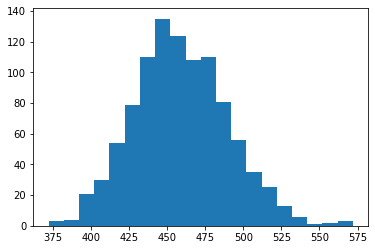

In [186]:
plt.hist(mean_reviews_1000, bins = 20)
plt.show()

# it is close to the normal distribution

### 4.2 Comparing sampling and bootstrap distributions

In [189]:
# sampling 500 rows from the coffee_focus dataset
coffee_focus_sample = coffee_focus.sample(n=500)
coffee_focus_resamp = coffee_focus_sample.sample()
coffee_focus_sample.head()

,index,coffee_type,rating,reviews
1014,1256,medium roast,0.0,0
842,1028,cold brew coffee,4.8,87
427,501,"colombian,arabica,medium-dark roast,dark roast",2.1,7
555,666,medium roast,3.8,12
945,1167,medium roast,4.4,2360


In [209]:
# the bootstrap of mean coffee reviews
mean_reviews_5000 = []
for i in range(1000):
    mean_reviews_5000.append(
        np.mean(coffee_resamp.sample(frac = 1, replace = True)['reviews'])
    )
    
bootstrap_distn = mean_reviews_5000
print(bootstrap_distn[:10])

[465.81980374665477, 449.03835860838535, 405.3648528099911, 447.8242640499554, 468.1828724353256, 480.67975022301516, 434.08028545941124, 468.3443354148082, 421.58965209634255, 410.13737734165926]


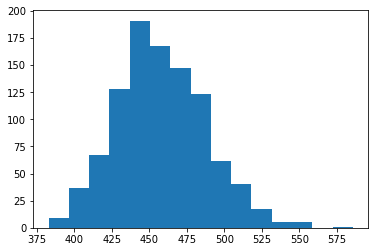

In [190]:
plt.hist(mean_reviews_5000, bins = 15)
plt.show()

In [210]:
# sample mean 
coffee_focus_sample['reviews'].mean()
# in the bootstrap distribution, each value is an estimate of the mean review score

462.16

In [194]:
# estimated population mean - bootstrap
bootstrap_distn['reviews'].mean()

457.78768956289025

In [218]:
# true population mean 
coffee_focus['reviews'].mean()

462.3586083853702

**Bootstrap distribution mean:**
- Usually close to the sample mean 
  - If the sampling is not representative, bootstrapping cannot correct biases
- However, we still can quantify variation
 - The standard deviation of the bootstrap **(estimated standard error)** can be used as a way to estimatet this measure of uncentainty
 - **Population std. dev = std. Error * np.sqrt(sample size)** - *It is a good way to estimate the std of population by the std of bootsrap*

In [212]:
# sample standard deviation
coffee_focus_sample['reviews'].std()

1063.225207603812

In [214]:
# estimated population standard deviation - bootstrap
standard_error = np.std(bootstrap_distn, ddof = 1)
standard_error

30.529987712132538

In [215]:
print(standard_error * np.sqrt(500))
# we can use The std of the bootstrap to estimate the std of the population

682.6712787656164


In [217]:
# true population mean 
coffee_focus['reviews'].std(ddof = 0)

941.565755123673

### 4.3 Confidence interval 
- "Values within 1 std" includes a large number of values from each of thee distributions

**Bootstrap distribution of mean**

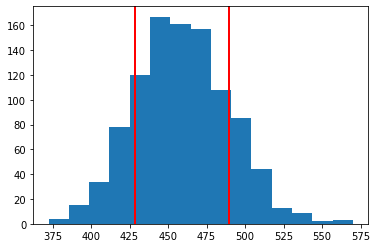

In [231]:
plt.hist(bootstrap_distn, bins = 15)
plt.axline(xy1 = (428.5743,0), xy2 = (428.5743, 120), linewidth = 2, color = 'red')
plt.axline(xy1 = (489.6343,0), xy2 = (489.6343, 120), linewidth = 2, color = 'red')
plt.show()

In [221]:
# mean of the resample 
np.mean(bootstrap_distn)

459.1043363068689

**Mean plus or minus 1 std - to create a confidence interval**

In [222]:
np.mean(bootstrap_distn) - np.std(bootstrap_distn, ddof = 1)

428.57434859473636

In [224]:
np.mean(bootstrap_distn) + np.std(bootstrap_distn, ddof = 1)

489.63432401900144

**confidence intervals**
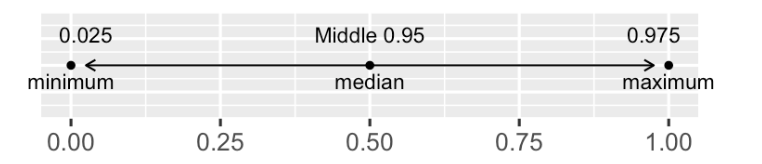

In [247]:
lower_quant = np.quantile(bootstrap_distn, 0.025)
lower_quant

401.7142952720785

In [233]:
upper_quant = np.quantile(bootstrap_distn, 0.975)
upper_quant

517.6291034790364

**Inverse cumulative distribution**
- Probability density function(PDF): the bell curve
- Cumulative distribution function(CDF): integrate to get areaunder bell curve
- Inv. CDF: flip x and y axes

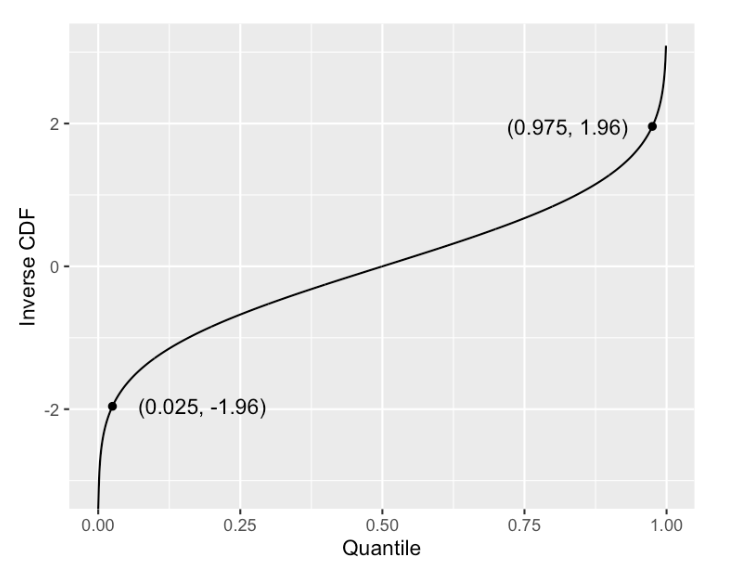

In [248]:
# calculate confidence interval 
# inverse CDF: it takes a quantile between 0 and 1 
# return the values of normal distribution for that quantile
# Normal distribution: loc = 0, scale = 1 is default
from scipy.stats import norm
norm.ppf(quantile, loc = 0, scale = 1)

nan

In [238]:
# the 2rd method to calculate confidence interval
point_estimate = np.mean(bootstrap_distn)
point_estimate

459.1043363068689

In [240]:
std_error = np.std(bootstrap_distn, ddof = 1)
std_error

30.529987712132538

In [242]:
from scipy.stats import norm
lower = norm.ppf(0.025, loc = point_estimate, scale = std_error)
upper = norm.ppf(0.975, loc = point_estimate, scale = std_error)
print((lower, upper))

(399.26665994263874, 518.9420126710991)


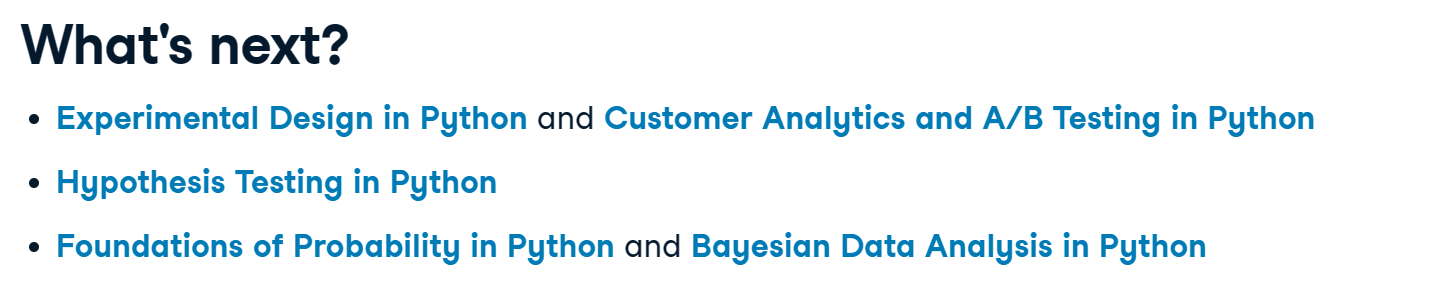